### Genetic Algorithm

In [1]:
# 1. Genetic Algorithm Lab: Solving the Maximum Ones Problem
# We'll use a simple genetic algorithm to maximize the number of "1"s in a binary string.

# Step 1: Imports and Parameters
import numpy as np
import random

In [2]:
# Step 2: GA Functions
def create_individual(length):
    # Random binary individual
    return np.random.randint(2, size=length)

def fitness(individual):
    # Objective: maximize number of 1s
    return sum(individual)

def mutate(individual, mutation_rate=0.01):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]
    return individual

def crossover(parent1, parent2):
    point = random.randint(1, len(parent1)-1)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2

In [3]:
def genetic_algorithm(population_size=10, chromosome_length=8, generations=20, mutation_rate=0.01):
    print("hellow")
    population = [create_individual(chromosome_length) for _ in range(population_size)]

    for g in range(generations):
        scored = sorted(
            [(fitness(ind), ind) for ind in population],
            key=lambda pair: pair[0],
            reverse=True
        )
        print(f"Gen {g} | Best: {scored[0][0]} | Avg: {np.mean([f for f,_ in scored])}")

        next_gen = [scored[0][1], scored[1][1]]  # Elite selection

        while len(next_gen) < population_size:
            parents = random.sample(scored[:5], 2)
            c1, c2 = crossover(parents[0][1], parents[1][1])
            next_gen.append(mutate(c1.copy(), mutation_rate))
            if len(next_gen) < population_size:
                next_gen.append(mutate(c2.copy(), mutation_rate))

        population = next_gen

    print("Best individual:", scored[0][1], "with fitness:", scored[0][0])
genetic_algorithm()

hellow
Gen 0 | Best: 7 | Avg: 4.3
Gen 1 | Best: 7 | Avg: 5.4
Gen 2 | Best: 7 | Avg: 6.5
Gen 3 | Best: 7 | Avg: 6.9
Gen 4 | Best: 7 | Avg: 7.0
Gen 5 | Best: 8 | Avg: 7.0
Gen 6 | Best: 8 | Avg: 7.2
Gen 7 | Best: 8 | Avg: 7.9
Gen 8 | Best: 8 | Avg: 7.8
Gen 9 | Best: 8 | Avg: 7.9
Gen 10 | Best: 8 | Avg: 7.9
Gen 11 | Best: 8 | Avg: 8.0
Gen 12 | Best: 8 | Avg: 7.9
Gen 13 | Best: 8 | Avg: 7.9
Gen 14 | Best: 8 | Avg: 7.9
Gen 15 | Best: 8 | Avg: 8.0
Gen 16 | Best: 8 | Avg: 8.0
Gen 17 | Best: 8 | Avg: 7.9
Gen 18 | Best: 8 | Avg: 7.8
Gen 19 | Best: 8 | Avg: 7.9
Best individual: [1 1 1 1 1 1 1 1] with fitness: 8


In [5]:
# Extension
def create_individual(length):
    return np.random.randint(2, size=length)

def fitness(individual):
    return sum(individual)

def mutate(individual, mutation_rate=0.01):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]
    return individual

def crossover(parent1, parent2):
    point = random.randint(1, len(parent1)-1)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2

# Main Genetic Algorithm Function
def genetic_algorithm(population_size=20, chromosome_length=16, generations=30, mutation_rate=0.01):
    population = [create_individual(chromosome_length) for _ in range(population_size)]

    for g in range(generations):
        scored = sorted(
            [(fitness(ind), ind) for ind in population],
            key=lambda pair: pair[0],
            reverse=True
        )
        best_fitness = scored[0][0]
        avg_fitness = np.mean([f for f, _ in scored])
        print(f"Gen {g} | Best: {best_fitness} | Avg: {avg_fitness:.2f}")

        next_gen = [scored[0][1], scored[1][1]]  # Elitism: top 2 carried forward

        while len(next_gen) < population_size:
            parents = random.sample(scored[:5], 2)  # Select top 5 for breeding
            c1, c2 = crossover(parents[0][1], parents[1][1])
            next_gen.append(mutate(c1.copy(), mutation_rate))
            if len(next_gen) < population_size:
                next_gen.append(mutate(c2.copy(), mutation_rate))

        population = next_gen

    print("\nBest individual:", scored[0][1], "| Fitness:", scored[0][0])

#Run the GA with increased complexity
genetic_algorithm(
    population_size=20,
    chromosome_length=16,
    generations=30,
    mutation_rate=0.01
)

Gen 0 | Best: 12 | Avg: 7.90
Gen 1 | Best: 12 | Avg: 9.85
Gen 2 | Best: 13 | Avg: 11.30
Gen 3 | Best: 14 | Avg: 12.00
Gen 4 | Best: 14 | Avg: 13.25
Gen 5 | Best: 15 | Avg: 13.80
Gen 6 | Best: 15 | Avg: 14.75
Gen 7 | Best: 16 | Avg: 14.90
Gen 8 | Best: 16 | Avg: 15.10
Gen 9 | Best: 16 | Avg: 15.90
Gen 10 | Best: 16 | Avg: 16.00
Gen 11 | Best: 16 | Avg: 15.85
Gen 12 | Best: 16 | Avg: 15.85
Gen 13 | Best: 16 | Avg: 15.60
Gen 14 | Best: 16 | Avg: 15.95
Gen 15 | Best: 16 | Avg: 15.80
Gen 16 | Best: 16 | Avg: 15.85
Gen 17 | Best: 16 | Avg: 15.90
Gen 18 | Best: 16 | Avg: 15.90
Gen 19 | Best: 16 | Avg: 15.90
Gen 20 | Best: 16 | Avg: 15.90
Gen 21 | Best: 16 | Avg: 15.90
Gen 22 | Best: 16 | Avg: 15.90
Gen 23 | Best: 16 | Avg: 15.95
Gen 24 | Best: 16 | Avg: 15.85
Gen 25 | Best: 16 | Avg: 15.95
Gen 26 | Best: 16 | Avg: 15.90
Gen 27 | Best: 16 | Avg: 15.80
Gen 28 | Best: 16 | Avg: 15.80
Gen 29 | Best: 16 | Avg: 15.70

Best individual: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] | Fitness: 16


In [7]:
import random
import string

# Target string to match
TARGET = "HELLO WORLD"
CHROMOSOME_LENGTH = len(TARGET)
GENES = string.ascii_uppercase + " "  # allowed characters (A-Z and space)

# Create a random individual (random string)
def create_individual(length):
    return ''.join(random.choice(GENES) for _ in range(length))

# Fitness: Number of matching characters at correct positions
def fitness(individual):
    return sum(1 for i, c in enumerate(individual) if c == TARGET[i])

# Mutate: Randomly change characters with some probability
def mutate(individual, mutation_rate=0.01):
    return ''.join(
        c if random.random() > mutation_rate else random.choice(GENES)
        for c in individual
    )

# Crossover: Single-point crossover between two strings
def crossover(parent1, parent2):
    point = random.randint(1, CHROMOSOME_LENGTH - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# Genetic Algorithm main function
def genetic_algorithm(population_size=100, generations=1000, mutation_rate=0.01):
    population = [create_individual(CHROMOSOME_LENGTH) for _ in range(population_size)]

    for g in range(generations):
        scored = sorted(
            [(fitness(ind), ind) for ind in population],
            key=lambda pair: pair[0],
            reverse=True
        )
        best_fit, best_ind = scored[0]
        print(f"Gen {g} | Best: {best_fit} | {best_ind}")

        if best_fit == CHROMOSOME_LENGTH:
            print("\n Target matched!")
            break

        next_gen = [best_ind, scored[1][1]]  # Elitism

        while len(next_gen) < population_size:
            parents = random.sample(scored[:10], 2)
            c1, c2 = crossover(parents[0][1], parents[1][1])
            next_gen.append(mutate(c1, mutation_rate))
            if len(next_gen) < population_size:
                next_gen.append(mutate(c2, mutation_rate))

        population = next_gen

    print("\n Best match:", best_ind)

# Run the algorithm
genetic_algorithm()


Gen 0 | Best: 3 | BELIOBAWTZG
Gen 1 | Best: 4 | BELIOBVZILK
Gen 2 | Best: 5 | BELIO OSSKD
Gen 3 | Best: 6 | HELQOLKDSLD
Gen 4 | Best: 7 | HELIOBAOPLD
Gen 5 | Best: 9 | HELLO AOPLD
Gen 6 | Best: 9 | HELLO AOPLD
Gen 7 | Best: 9 | HELLO AOPLD
Gen 8 | Best: 9 | HELLO AOPLD
Gen 9 | Best: 9 | HELLO AOPLD
Gen 10 | Best: 9 | HELLO AOPLD
Gen 11 | Best: 9 | HELLO AOPLD
Gen 12 | Best: 9 | HELLO AOPLD
Gen 13 | Best: 9 | HELLO AOPLD
Gen 14 | Best: 10 | HELLO OORLD
Gen 15 | Best: 10 | HELLO OORLD
Gen 16 | Best: 10 | HELLO OORLD
Gen 17 | Best: 10 | HELLO OORLD
Gen 18 | Best: 10 | HELLO OORLD
Gen 19 | Best: 10 | HELLO OORLD
Gen 20 | Best: 10 | HELLO OORLD
Gen 21 | Best: 10 | HELLO OORLD
Gen 22 | Best: 10 | HELLO OORLD
Gen 23 | Best: 10 | HELLO OORLD
Gen 24 | Best: 10 | HELLO OORLD
Gen 25 | Best: 10 | HELLO OORLD
Gen 26 | Best: 10 | HELLO OORLD
Gen 27 | Best: 10 | HELLO OORLD
Gen 28 | Best: 10 | HELLO OORLD
Gen 29 | Best: 10 | HELLO OORLD
Gen 30 | Best: 10 | HELLO OORLD
Gen 31 | Best: 10 | HELLO OORLD


### Artificial Neural Network

In [8]:
# Step 1: Imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [9]:
# Step 2: Data Preparation
# Load data and prepare splits
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [13]:
# Step 3: Build and Train the Neural Network
model = keras.Sequential([
    keras.layers.Dense(8, activation='relu', input_shape=(4,)),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(3, activation='softmax') # 3 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=75, validation_data=(X_test, y_test))

Epoch 1/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.3821 - loss: 0.9559 - val_accuracy: 0.3684 - val_loss: 0.9649
Epoch 2/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3936 - loss: 0.9493 - val_accuracy: 0.3684 - val_loss: 0.9553
Epoch 3/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4030 - loss: 0.9291 - val_accuracy: 0.3947 - val_loss: 0.9460
Epoch 4/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4149 - loss: 0.9125 - val_accuracy: 0.3947 - val_loss: 0.9374
Epoch 5/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4372 - loss: 0.9163 - val_accuracy: 0.3947 - val_loss: 0.9292
Epoch 6/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4308 - loss: 0.9118 - val_accuracy: 0.4211 - val_loss: 0.9212
Epoch 7/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4940 - loss: 0.8953 - val_accuracy: 0.4474 - val_loss: 0.9134
Epoch 8/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4835 - loss: 0.9032 - val_accuracy: 0.5000 - val_loss: 0.9058


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9370 - loss: 0.5205

Test accuracy: 0.9210526347160339


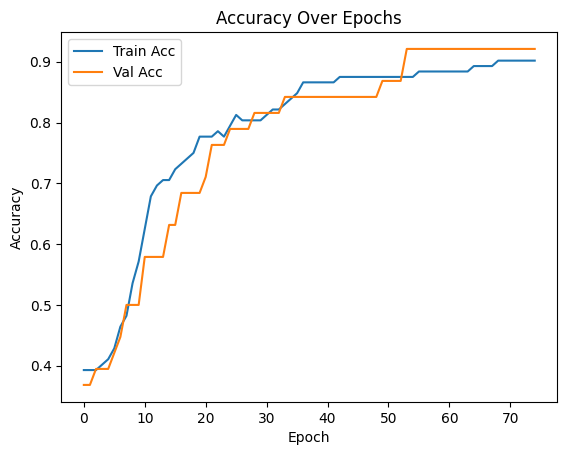

In [14]:
# Step 4: Evaluate and Visualize Results
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

In [12]:
# Rebuild the model with different architecture
model = keras.Sequential([
    keras.layers.Input(shape=(4,)),                      # cleaner than input_shape param
    keras.layers.Dense(16, activation='tanh'),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(3, activation='softmax')          # output layer for 3 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Retrain
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.4945 - loss: 1.0950 - val_accuracy: 0.4737 - val_loss: 1.0543
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5778 - loss: 1.0447 - val_accuracy: 0.6316 - val_loss: 1.0173
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6461 - loss: 1.0109 - val_accuracy: 0.7105 - val_loss: 0.9846
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7158 - loss: 0.9830 - val_accuracy: 0.8158 - val_loss: 0.9558
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7312 - loss: 0.9571 - val_accuracy: 0.8421 - val_loss: 0.9239
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7966 - loss: 0.9214 - val_accuracy: 0.8421 - val_loss: 0.8879
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7929 - loss: 0.8971 - val_accuracy: 0.8421 - val_loss: 0.8503
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8048 - loss: 0.8731 - val_accuracy: 0.8421 - val_loss: 0.8130


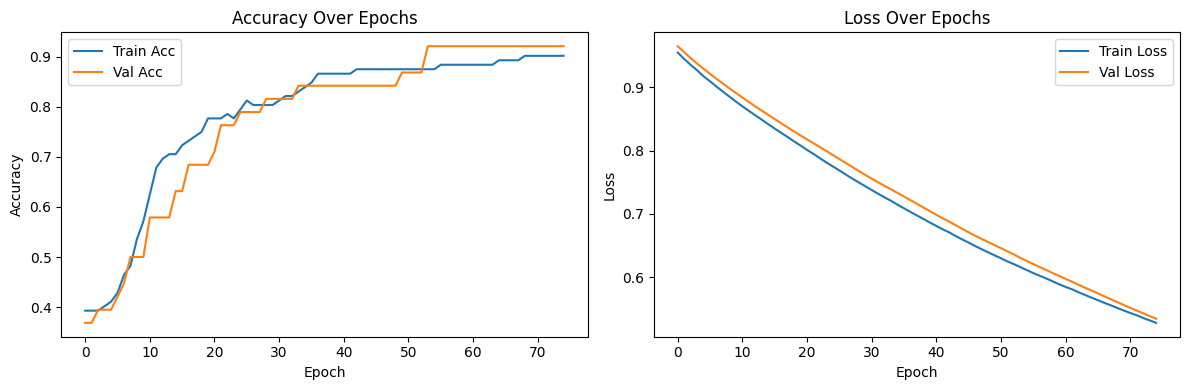

In [15]:
# Visualize both accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.tight_layout()
plt.show()


In [16]:
# New iris measurement (e.g., Sepal Length, Sepal Width, Petal Length, Petal Width)
example = scaler.transform([[5.1, 3.5, 1.4, 0.2]])

# Predict probabilities
prediction = model.predict(example)
print("Predicted probabilities:", prediction)

# Get class with highest probability
predicted_class = np.argmax(prediction)
class_name = iris.target_names[predicted_class]
print("Predicted class:", predicted_class, "-", class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Predicted probabilities: [[0.43191653 0.32072085 0.24736266]]
Predicted class: 0 - setosa
